In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scikitplot as skplt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
data=pd.read_excel(r"C:\Users\dnyap\OneDrive\Desktop\Big Data Analytics Project\Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Exploring features i.e. how many of them are categorical and numerical features
numeric=[feature for feature in data.columns if data[feature].dtype != 'O']
categorical=[feature for feature in data.columns if data[feature].dtype == 'O']

#print columns

print(f'We have {len(numeric)} numerical feature :{numeric}')
print(f'We have {len(categorical)} categorical features :{categorical}') 

We have 1 numerical feature :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

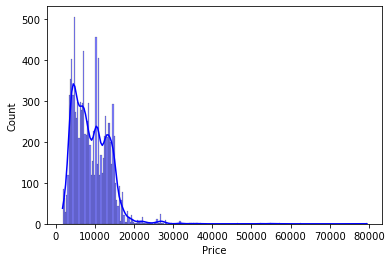

In [11]:
#Price Distribution
sns.histplot(data.Price, bins=250, kde=True, color = 'b')


In [12]:
#Top 10 Aviation Companies whose flight tickets are sold the most ?
data.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

In [13]:
#Extracting Date & Month from Date of Journey Column
'''
Converting into Datetime:
We are going to extract the date and month from the date of the journey .
For this, we require pandas to_datetime to convert the object data type to DateTime data type .
.dt.day the method will extract only the day from the date.
.dt.month the method will extract only the month of that date.
'''
#Date

data["journeyDate"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [14]:
#month
data["journeyMonth"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [15]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journeyDate,journeyMonth
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# Extracting Hours
data['DepartureHour']=pd.to_datetime(data['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
data['DepartureMin']=pd.to_datetime(data['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
data.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
# Extracting Hours
data['ArrivalHour']=pd.to_datetime(data['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
data['ArrivalMin']=pd.to_datetime(data['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
# Assigning and converting Duration column into list to extract hours ans minutes seperately
duration = list(data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
data["DurationHours"] = duration_hours
data["DurationMins"] = duration_mins

#we will remove the Durtaion column
data.drop(['Duration'],axis=1,inplace=True)

In [22]:
#OneHotEncoding -----> Nominal data
Airline = data[["Airline"]]
Airline = pd.get_dummies(data['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
#OneHotEncoding -----> Nominal data
Source = data[["Source"]]
Source = pd.get_dummies(data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [26]:
data['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin,DurationHours,DurationMins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [27]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_train=pd.concat([data,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin,DurationHours,DurationMins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data_train.head()

,Total_Stops,Price,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin,DurationHours,DurationMins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [29]:
x= data_train[['Total_Stops', 'journeyDate', 'journeyMonth', 'DepartureHour',
       'DepartureMin', 'ArrivalHour', 'ArrivalMin', 'DurationHours',
       'DurationMins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin,DurationHours,DurationMins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y=data_train['Price']

In [31]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

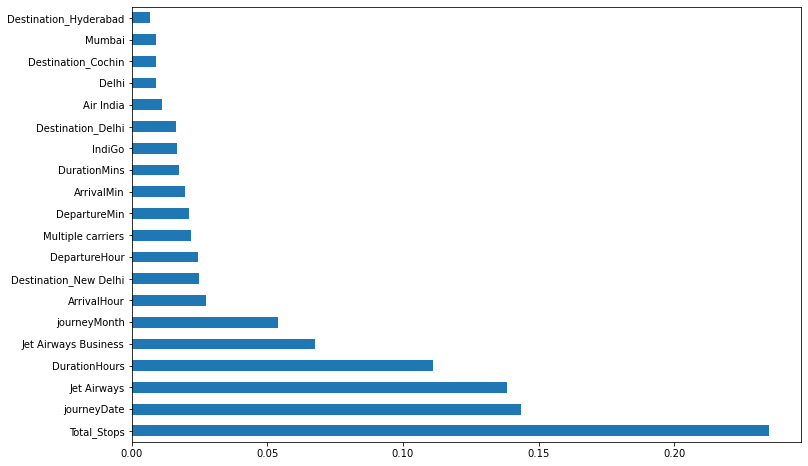

In [32]:
#plotting graph of feature importances 
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [33]:
#Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [34]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7477, 29) (7477,) (3205, 29) (3205,)


In [35]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [36]:
def evaluation_model(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is: ",r2)
    print(f"Adjusted R2 Score of the {model} model is: ",adjusted_r2)
    print()
    print(f"MAE of {model} model is: ",mae)
    print(f"MSE of {model} model is: ",mse)
    print(f"RMSE of {model} model is: ",rmse)
    

    # Scatter plot.
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='purple', label='Train')
    plt.scatter(y_test, y_test_pred, color='pink', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    sns.distplot(y_test-y_test_pred)
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()
    
    price_data = pd.DataFrame({"Predicted Price":np.rint(model.predict(x_test)),'Actual Price':y_test}).reset_index(drop=True)
    price_data.tail(10)
    plt.figure(figsize=(8,6))
    plt.title("Price",fontsize=15)
    plt.ylabel('Test Predicted price',fontsize=12)
    plt.xlabel('Test Actual price',fontsize=12)
    sns.regplot(data = price_data, x = 'Predicted Price', y = 'Actual Price',scatter_kws={"color": "pink"}, line_kws={"color": "red"})

    plt.text(70000,15000,'$ R^{2} $=' + str(round(r2, 4)),fontsize=15)
    plt.text(70000,10000,'MAE =' + str(round(mae)),fontsize=15)
    plt.show()


R2 Score of the DecisionTreeRegressor() model is:  0.679219299764098
Adjusted R2 Score of the DecisionTreeRegressor() model is:  0.6762893343131244

MAE of DecisionTreeRegressor() model is:  1389.05984399376
MSE of DecisionTreeRegressor() model is:  6555984.664114751
RMSE of DecisionTreeRegressor() model is:  2560.4657123489765


C:\Users\dnyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


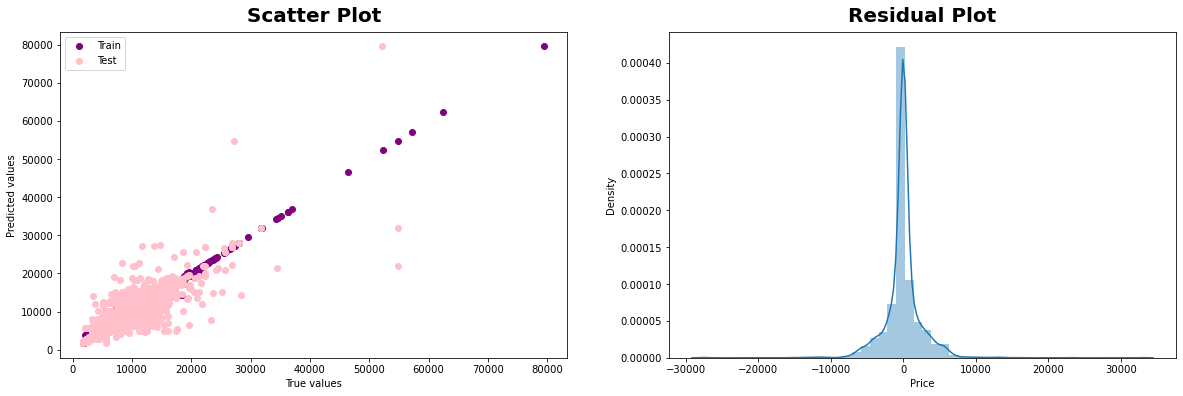

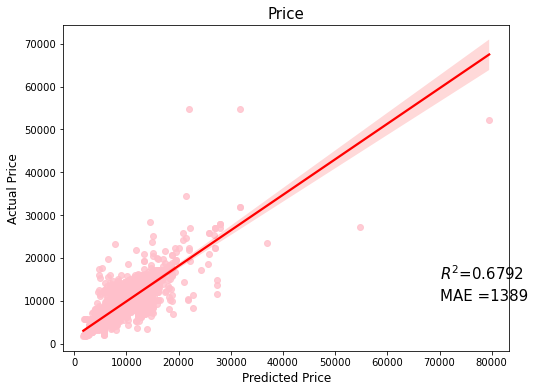

In [37]:
evaluation_model(DecisionTreeRegressor())

R2 Score of the RandomForestRegressor() model is:  0.8053386255023026
Adjusted R2 Score of the RandomForestRegressor() model is:  0.8035606160974418

MAE of RandomForestRegressor() model is:  1204.6596211426465
MSE of RandomForestRegressor() model is:  3978409.5020800433
RMSE of RandomForestRegressor() model is:  1994.5950722089042


C:\Users\dnyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


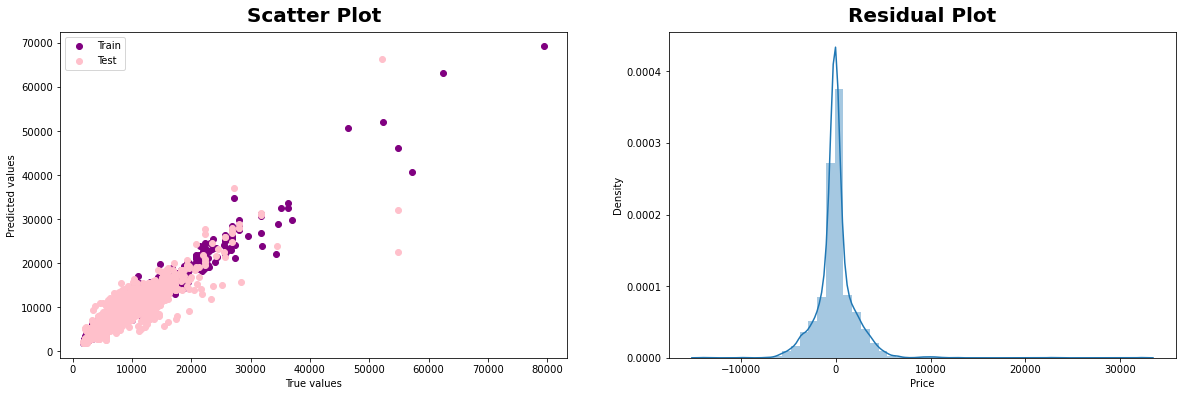

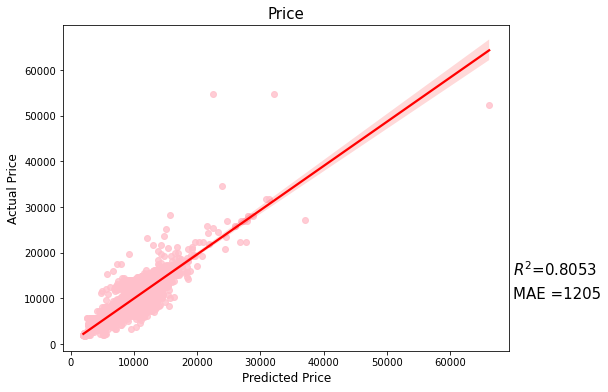

In [38]:
evaluation_model(RandomForestRegressor())

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is:  0.8248592773784114
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stoppin

C:\Users\dnyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


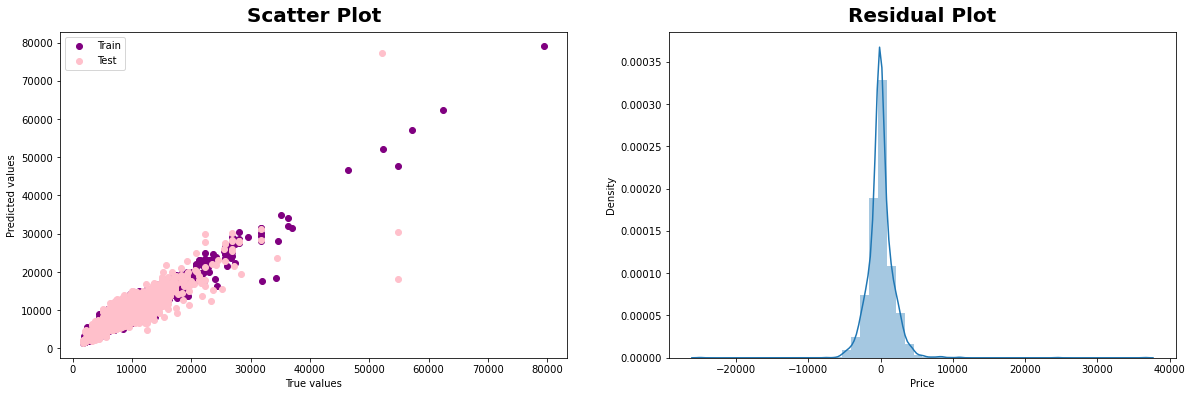

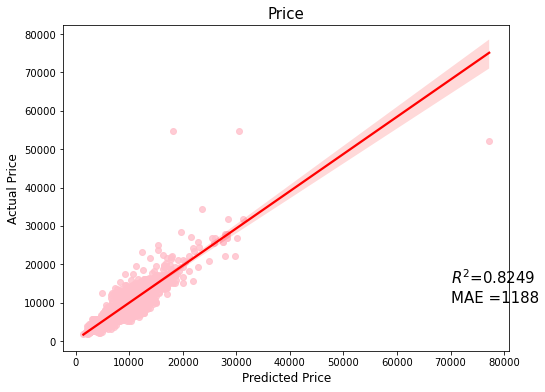

In [39]:
evaluation_model(XGBRegressor())

R2 Score of the LinearRegression() model is:  0.604789656592442
Adjusted R2 Score of the LinearRegression() model is:  0.6011798613298218

MAE of LinearRegression() model is:  1912.6057949864448
MSE of LinearRegression() model is:  8077147.249114609
RMSE of LinearRegression() model is:  2842.0322392813578


C:\Users\dnyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


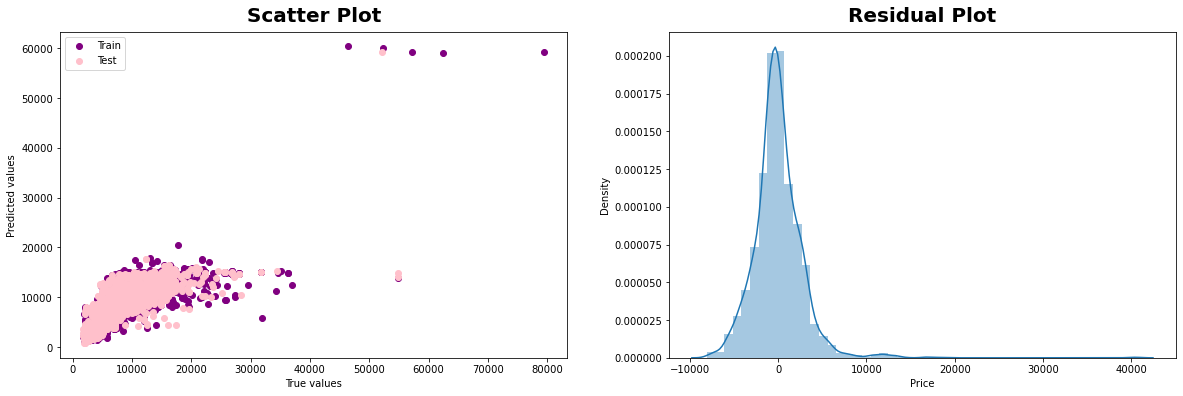

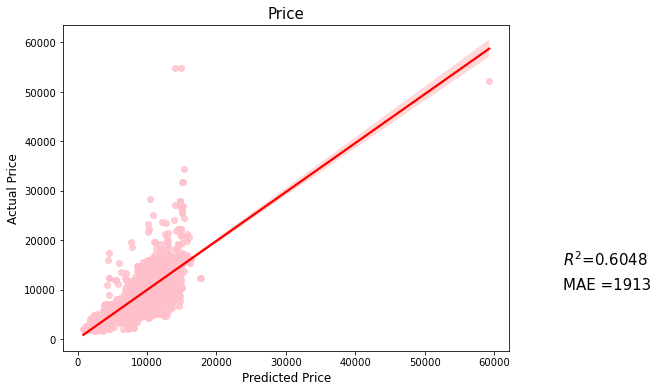

In [40]:
evaluation_model(LinearRegression())

In [41]:
#Hyper Parameter Tuning
model_xgb_hyperparam=XGBRegressor()

In [42]:
params = {
    'n_estimators': np.arange(100, 500, 25),  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 15),  
    'min_child_weight': np.arange(3, 14),  
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [43]:
random_search = RandomizedSearchCV(model_xgb_hyperparam, param_distributions=params, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='r2')
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                

In [44]:
best_features = random_search.best_params_
best_features

{'subsample': 1.0,
 'n_estimators': 225,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [45]:
model_xgb_hyperparam = XGBRegressor(**best_features)

In [46]:
model_xgb_hyperparam.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=225, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=225, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is:  0.832061554928512
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=No

C:\Users\dnyap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


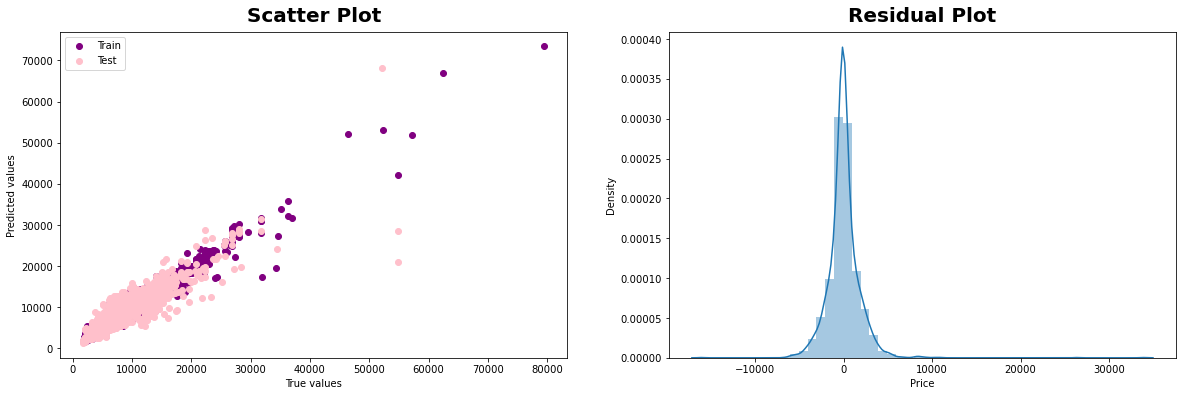

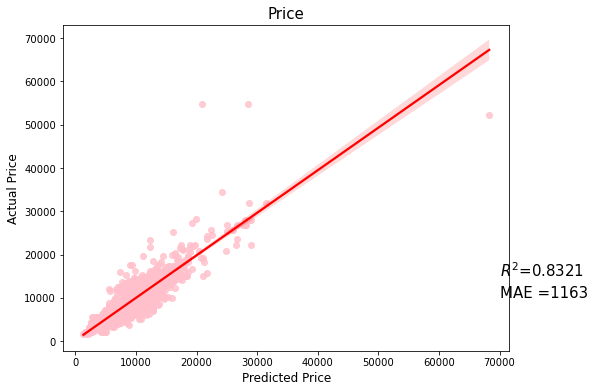

In [47]:

y_train_pred= model_xgb_hyperparam.predict(x_train)
y_test_pred = model_xgb_hyperparam.predict(x_test)

    #Metrics Calculation.
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)
adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
mae_value.append(mae)
mse_value.append(mse)
rmse_value.append(rmse)
r2_value.append(r2)
adjusted_r2_value.append(adjusted_r2) 
    
print(f"R2 Score of the {model_xgb_hyperparam} model is: ",r2)
print(f"Adjusted R2 Score of the {model_xgb_hyperparam} model is: ",adjusted_r2)
print()
print(f"MAE of {model_xgb_hyperparam} model is: ",mae)
print(f"MSE of {model_xgb_hyperparam} model is: ",mse)
print(f"RMSE of {model_xgb_hyperparam} model is: ",rmse)
    

# Scatter plot.
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)    
plt.scatter(y_train, y_train_pred, color='purple', label='Train')
plt.scatter(y_test, y_test_pred, color='pink', label='Test')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
# Residual plot.
plt.subplot(1,2,2)
sns.distplot(y_test-y_test_pred)
plt.title('Residual Plot',fontweight="black",size=20,pad=10)
plt.show()
    
price_data = pd.DataFrame({"Predicted Price":np.rint(model_xgb_hyperparam.predict(x_test)),'Actual Price':y_test}).reset_index(drop=True)
price_data.tail(10)
plt.figure(figsize=(8,6))
plt.title("Price",fontsize=15)
plt.ylabel('Test Predicted price',fontsize=12)
plt.xlabel('Test Actual price',fontsize=12)
sns.regplot(data = price_data, x = 'Predicted Price', y = 'Actual Price',scatter_kws={"color": "pink"}, line_kws={"color": "red"})

plt.text(70000,15000,'$ R^{2} $=' + str(round(r2, 4)),fontsize=15)
plt.text(70000,10000,'MAE =' + str(round(mae)),fontsize=15)
plt.show()

In [48]:
algos = ["Decision Tree Regressor", "Random Forest Regressor", "XG Boost Regressor", "Linear Regressor","XG Boost Regressor with Hyper parameter tuning"]


In [49]:
comparison_df =  pd.DataFrame({"Model":algos, "R2_Score": r2_value, "Adjusted_R2_Score": adjusted_r2_value,"MAE" : mae_value,"MSE" : mse_value,"RMSE" : rmse_value})

In [50]:
comparison_df

,Model,R2_Score,Adjusted_R2_Score,MAE,MSE,RMSE
0,Decision Tree Regressor,0.679219,0.676289,1389.059844,6.555985e+06,2560.465712
1,Random Forest Regressor,0.805339,0.803561,1204.659621,3.978410e+06,1994.595072
2,XG Boost Regressor,0.824859,0.823260,1188.149026,3.579454e+06,1891.944610
3,Linear Regressor,0.604790,0.601180,1912.605795,8.077147e+06,2842.032239
4,XG Boost Regressor with Hyper parameter tuning,0.832062,0.830528,1163.334374,3.432257e+06,1852.635206


In [53]:
import pickle
file = open('flight_fare_pred.pkl', 'wb')
pickle.dump(model_xgb_hyperparam, file)

In [54]:
model = open('flight_fare_pred.pkl','rb')
flight_fare_pedictor = pickle.load(model)

In [55]:
flight_fare_pedictor.score(x_test,y_test)

0.832061554928512

In [56]:
x_test

,Total_Stops,journeyDate,journeyMonth,DepartureHour,DepartureMin,ArrivalHour,ArrivalMin,DurationHours,DurationMins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8206,1,9,5,9,0,19,15,10,15,0,...,0,0,1,0,0,1,0,0,0,0
1888,1,1,4,20,0,20,45,24,45,0,...,0,0,0,1,0,0,0,0,0,0
6252,1,6,6,7,0,19,15,12,15,1,...,0,0,1,0,0,1,0,0,0,0
3379,1,1,6,7,5,22,30,15,25,0,...,0,0,1,0,0,1,0,0,0,0
2132,0,12,5,13,15,14,45,1,30,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,24,6,9,0,4,25,19,25,0,...,0,0,1,0,0,1,0,0,0,0
7290,1,27,6,10,0,1,30,15,30,0,...,0,0,1,0,0,1,0,0,0,0
7748,0,24,3,7,55,10,15,2,20,0,...,0,1,0,0,0,0,0,0,1,0
2225,0,9,5,18,55,22,0,3,5,0,...,0,0,0,0,0,0,1,0,0,0
